<div style = "background-image: url('Images/Fire/port_fire.png'); height: 400px;vertical-align: middle;">
    <p>
        <h1 style = "color: white; text-align: center; line-height: 100px; font-family: serif;"> <u>Forest Fire Prediction </u> </h1> 
        <h2 style = "color: white; text-align: center; font-family: serif;"> Micigan Technological University </h2> 
        <h2 style = "color: white; text-align: center; font-family: serif;">MA 5751 Fall 2020</h2>
        <h3 style = "color: white; text-align: center; font-family: serif;"> Michael Nicodemus </h3>
    </p>
</div>
<div style = "background-color: white; height: 50px; line-height: 50px;">
<b>Image Source: </b><a href = "https://www.bbc.com/news/in-pictures-40317711"> https://www.bbc.com </a>
</div>


<div style = "background-color: white; height: 50px; line-height: 45px;">
    <b style = "font-family: Georgia, serif;">Data: </b><a href="https://archive.ics.uci.edu/ml/datasets/forest+fires">https://archive.ics.uci.edu/ml/datasets/forest+fires</a>
    
</div>

<div style = "background-color: white; height: 50px; line-height: 50px;">
    <b style = "font-family: Georgia, serif;">Github: </b><a href="https://github.com/nicodemusmd/Forest_Fire">https://github.com/nicodemusmd/Forest_Fire</a>
    
</div>

<div style = "background-color: AliceBlue; font-family: 'Times New Roman', Times, serif; width: 500px; border: 3px solid black">
    <b style = "font-family: Georgia, serif;"><u>Summary of Study:</u></b>
    <ol>
        <li>Variable Selection
            <ul>
                <li>EDA</li>
                <li>Variable Selection (Stepwise & Penalized Likelihood)</li>
                <li>Shrinkage Methods</li>
                <li>Model Selection on (AIC/BIC & CV)</li>
            </ul>
        </li>
        <li>Classification (With Bootsrap)
            <ul>
                <li>Logistic Regression</li>
                <li>Naive Bayes</li>
                <li>SVM </li>
                <li>LDA/QDA</li>
            </ul>  
        </li>
        <li>Tree-based Methods
            <ul>
                <li>Random Forests</li>
                <li>Bagging/Boosting</li>
                <li>Ensemble Tree</li>
            </ul>
        </li>
        <li>Unsupervised Learning
            <ul>
                <li>PCA</li>
                <li>K Means</li>
                <li>Spectral !!</li>
            </ul>   
        </li>
        <li>Deep Learning (With Hyperameter Tuning)
            <ul>
                <li>Neural Networks</li>
                <li>GAMs</li>
                <li>MARS (kernal smoothing splines)</li>
            </ul>
        </li>
    </ol> 


</div>

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import scipy as sp
import random as rd
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sklearn.model_selection as sk_ms
#import pyearth as pye

#from pyearth import earth
#Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Feature Selection
from sklearn.decomposition import PCA


####----------------------####
####--------Models--------####
from sklearn import linear_model

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
## NN
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

#Cluster
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import SpectralClustering




#Tree Based Methods
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree as pt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor as bag

####----------------------####

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score as EV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE


#Sampling
from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



#Custom Libraries
#from MyLibrary import Neural_Network_report as nnr
#from MyLibrary import RegressionReport as rep
from MyLibrary import predRespPlots as prt
from MyLibrary import fit_linear_reg as flr
from MyLibrary import feature_selection
from MyLibrary import plot_feature_selection_criterion

In [4]:
#Import data
file = "Data/forestfires.csv"
fire = pd.read_csv(file)

X = fire.drop(columns = "area")
y = fire.area
#Split the Data
X_train, X_test, y_train, y_test = TTS(X, y, test_size = 0.2, random_state = 5)

X_train.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0
360,6,5,sep,fri,92.5,122.0,789.7,10.2,18.4,42,2.2,0.0
221,3,4,sep,fri,93.3,141.2,713.9,13.9,18.6,49,3.6,0.0
469,6,3,apr,sun,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0
275,4,6,dec,thu,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0


## EDA

In [5]:
eda  = pd.concat([X_train, y_train], axis = 1)
eda.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
360,6,5,sep,fri,92.5,122.0,789.7,10.2,18.4,42,2.2,0.0,1.09
221,3,4,sep,fri,93.3,141.2,713.9,13.9,18.6,49,3.6,0.0,35.88
469,6,3,apr,sun,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13
275,4,6,dec,thu,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0,5.38


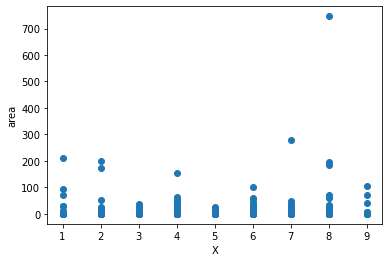

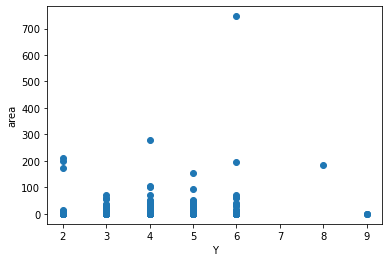

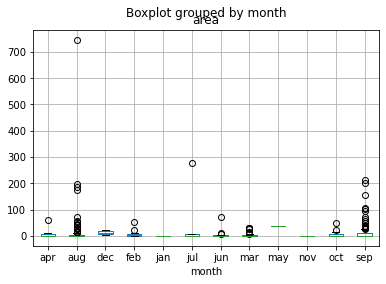

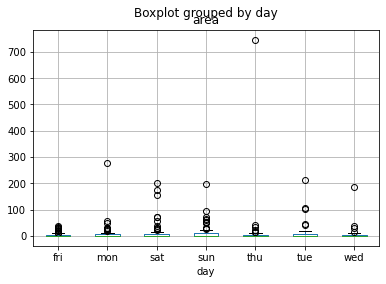

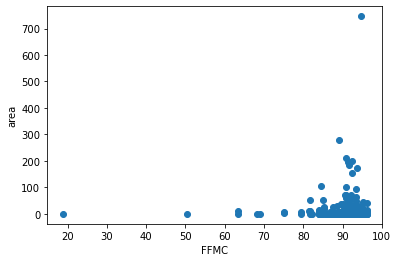

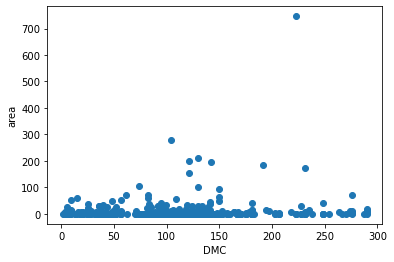

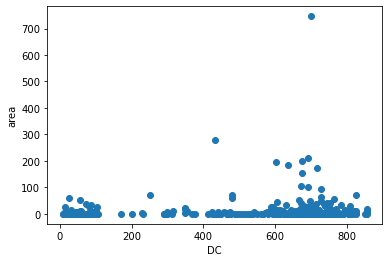

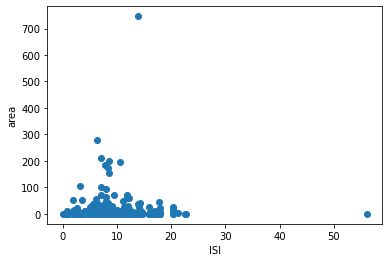

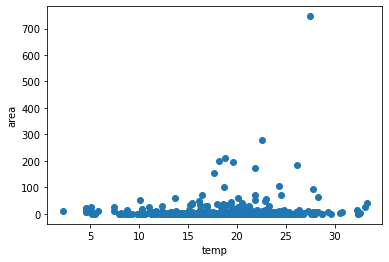

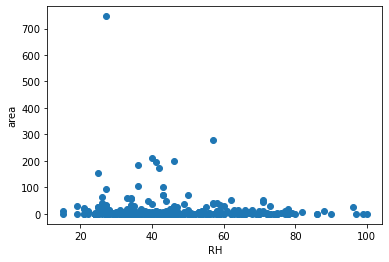

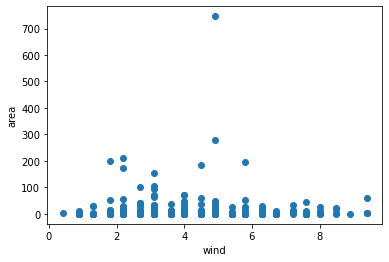

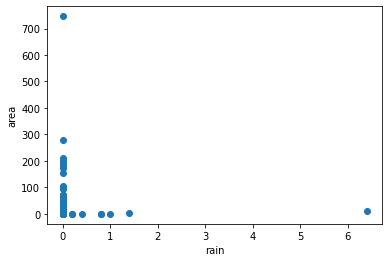

In [10]:
# custom function that will plot all predictors against response. This will save plots to Images/PredRespPlots unless 
# the save argument is removed/set to False.
prt(eda, "area", save = False, path = "Images/predRespPlots")

In [13]:
eda.shape

(413, 13)

In [14]:
o = list(set([(x,y) for (x,y) in zip(eda.X, eda.Y)]))

coor_burnt = {(i,j): [0,0] for (i,j) in o} ###[total_area_burnt, num_of_fires]

for k in eda.index:
    i = int(eda['X'][k])
    j = int(eda['Y'][k])
    coor_burnt[(i,j)][0] += eda['area'][k]
    coor_burnt[(i,j)][1] +=1
    

for m in coor_burnt.keys():
    a = round(coor_burnt[m][0],2)
    coor_burnt[m][0] = a


tot_area = []
tot_incidences = []
for coor in coor_burnt.keys():
    tot_area.append(coor_burnt[coor][0])
    tot_incidences.append(coor_burnt[coor][1])
mean_area = round(np.mean(tot_area),2)
mean_incid = round(np.mean(tot_incidences),2)
var_area = round(np.var(tot_area),2)
var_incid = round(np.var(tot_incidences),2)

print(mean_area)
print(mean_incid)
print(var_area)
print(var_incid)

#Total area burnt and number of fire incidences by coordinate
coor_burnt

139.56
11.8
50090.72
149.53


{(3, 4): [99.79, 34],
 (4, 3): [74.78, 12],
 (5, 4): [65.7, 18],
 (4, 6): [78.75, 5],
 (9, 5): [8.16, 2],
 (8, 3): [26.31, 3],
 (8, 6): [1249.16, 46],
 (2, 2): [424.0, 21],
 (2, 5): [63.86, 15],
 (1, 3): [113.1, 8],
 (7, 4): [455.98, 37],
 (6, 5): [251.27, 38],
 (4, 5): [287.01, 23],
 (5, 6): [17.62, 4],
 (3, 6): [0.0, 3],
 (8, 5): [2.25, 3],
 (9, 4): [183.98, 3],
 (8, 8): [185.76, 1],
 (2, 4): [115.05, 18],
 (1, 2): [213.59, 17],
 (1, 5): [115.47, 4],
 (6, 4): [144.47, 9],
 (7, 3): [27.35, 2],
 (7, 6): [0.0, 1],
 (3, 5): [2.18, 5],
 (4, 4): [299.17, 29],
 (5, 5): [0.0, 3],
 (8, 4): [12.18, 1],
 (9, 9): [0.36, 3],
 (9, 6): [42.87, 1],
 (1, 4): [51.77, 9],
 (2, 3): [0.0, 1],
 (6, 6): [8.59, 3],
 (7, 5): [77.39, 11],
 (6, 3): [186.68, 20]}

<div style = "background-image: url('Images/Fire/Map.png'); width: 1158px; height: 717px; vertical-align: middle;">

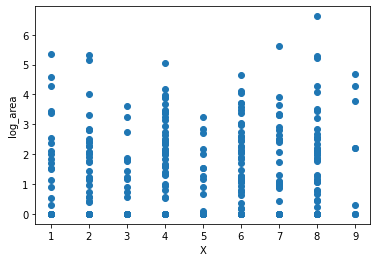

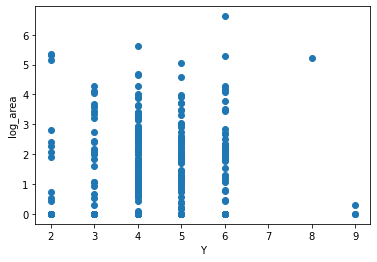

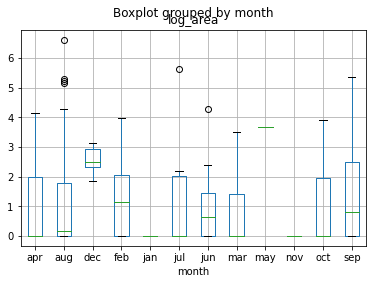

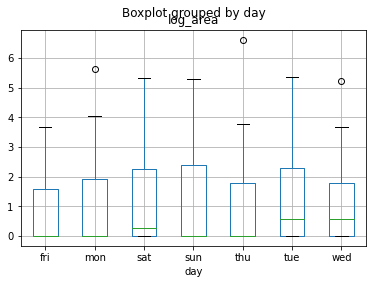

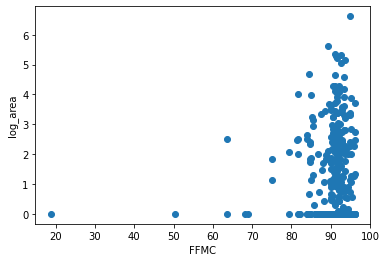

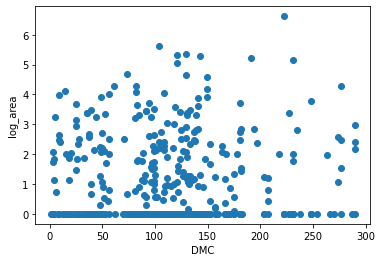

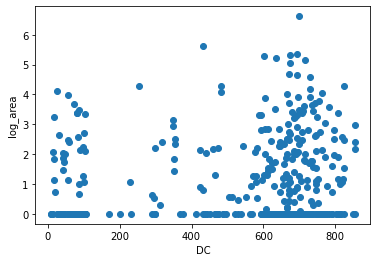

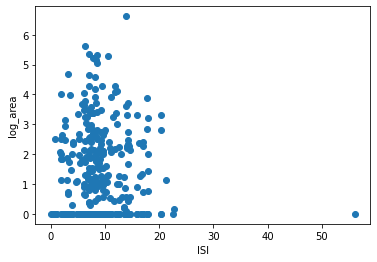

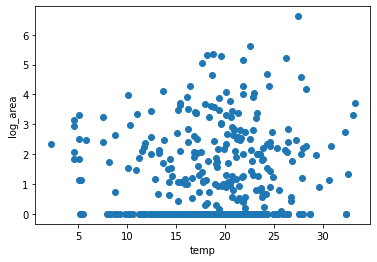

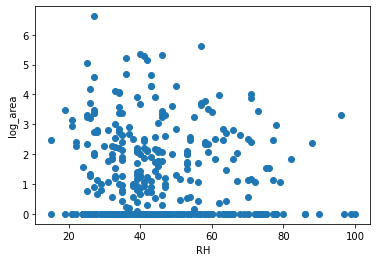

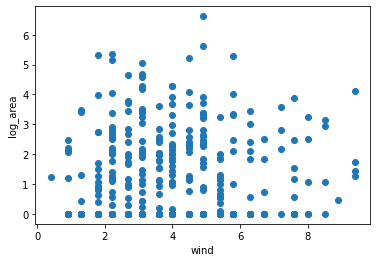

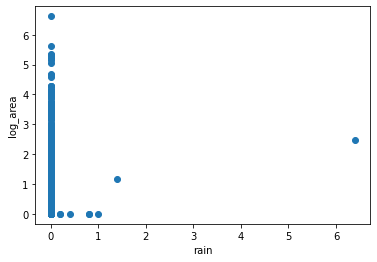

In [15]:
eda["log_area"] = np.log(eda["area"] + 1)
df = eda.drop(columns = "area")
#look at scatter plots after y transformation
prt(df, "log_area", save = False, path = "Images/EDA")

<AxesSubplot:>

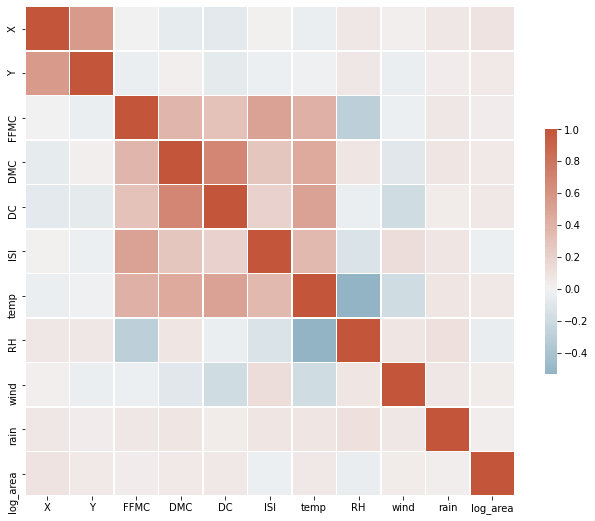

In [16]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#fig.savefig("Images/EDA/SNS_Cor_HMAP.png")

In [17]:
#fire.month.unique()
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_val = {mon: round(np.sin(2*months.index(mon)*np.pi/12),2) for mon in months}

def get_val(s):
    return month_val[s]

def is_weekend(d):
    if d in ['fri', 'sat', 'sun']:
        return 1
    else:
        return 0

fire_tr = df
fire_tr["Month_Cycle_Score"] = fire_tr['month'].apply(get_val)
fire_tr["Weekend"] = fire_tr['day'].apply(is_weekend)

X_mw = fire_tr.drop(columns = ['month', 'day'])


y_mw = fire_tr["log_area"]

X_mw.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area,Month_Cycle_Score,Weekend
140,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.385262,-0.87,0
360,6,5,92.5,122.0,789.7,10.2,18.4,42,2.2,0.0,0.737164,-0.87,1
221,3,4,93.3,141.2,713.9,13.9,18.6,49,3.6,0.0,3.607669,-0.87,1
469,6,3,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,4.129229,1.00,1
275,4,6,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0,1.853168,-0.50,0


<AxesSubplot:>

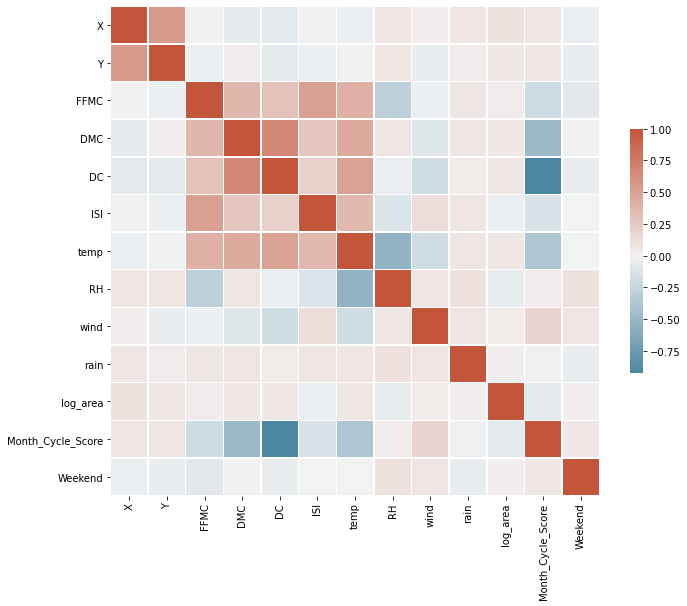

In [18]:
corr = X_mw.corr()
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#fig.savefig("Images/EDA/SNS_Cor_HMAP_transformed_month.png")

Since my defined month variable did not turn out to be correlated with the area burnt and neither did my weekend variable, I will revert back to the data frame 'df' to perform the variable selection.

For Feature Selection, I am using the fit_linear_reg() function as found <a href = "https://colab.research.google.com/drive/1acRIrPQpa_6IHkIlNkGJzsIlxz-ibY0M?usp=sharing#scrollTo=CV-vud5Cpg_r">here</a>

In [19]:
eda.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,0.385262
360,6,5,sep,fri,92.5,122.0,789.7,10.2,18.4,42,2.2,0.0,1.09,0.737164
221,3,4,sep,fri,93.3,141.2,713.9,13.9,18.6,49,3.6,0.0,35.88,3.607669
469,6,3,apr,sun,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,4.129229
275,4,6,dec,thu,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0,5.38,1.853168


In [21]:
# Get Dummy variables
df = pd.get_dummies(eda, prefix=['month', 'day'])
data = df.drop(columns = ["area", "log_area"])
data.shape


(413, 29)

                      features            RSS  R_squared  numb_features
1                       [temp]  887708.686403   0.010661              1
2                    [temp, X]  881514.092557   0.017565              2
3               [temp, X, DMC]  877886.589562   0.021607              3
4      [temp, X, DMC, day_fri]  874293.912135   0.025611              4
5  [temp, X, DMC, day_fri, RH]  872159.942877   0.027990              5


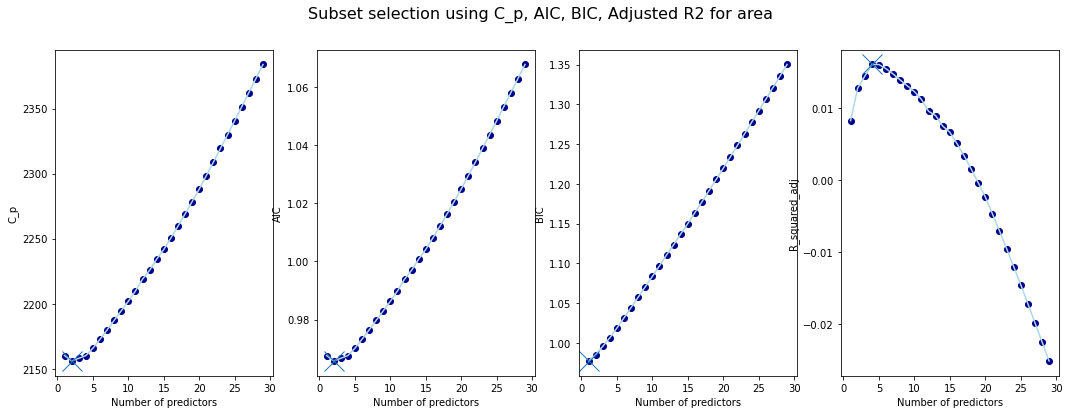

Criteria: C_p Model Predictors: ['temp', 'X']

Criteria: AIC Model Predictors: ['temp', 'X']

Criteria: BIC Model Predictors: ['temp']

Criteria: R_squared_adj Model Predictors: ['temp', 'X', 'DMC', 'day_fri']

---------------------------------------------------
---------------------------------------------------
---------------------------------------------------
                                        features         RSS  R_squared  \
1                                    [month_dec]  819.036818   0.012631   
2                         [month_dec, month_sep]  809.786096   0.023783   
3                      [month_dec, month_sep, X]  801.005895   0.034368   
4           [month_dec, month_sep, X, month_may]  793.444933   0.043483   
5  [month_dec, month_sep, X, month_may, day_fri]  785.913627   0.052562   

   numb_features  
1              1  
2              2  
3              3  
4              4  
5              5  


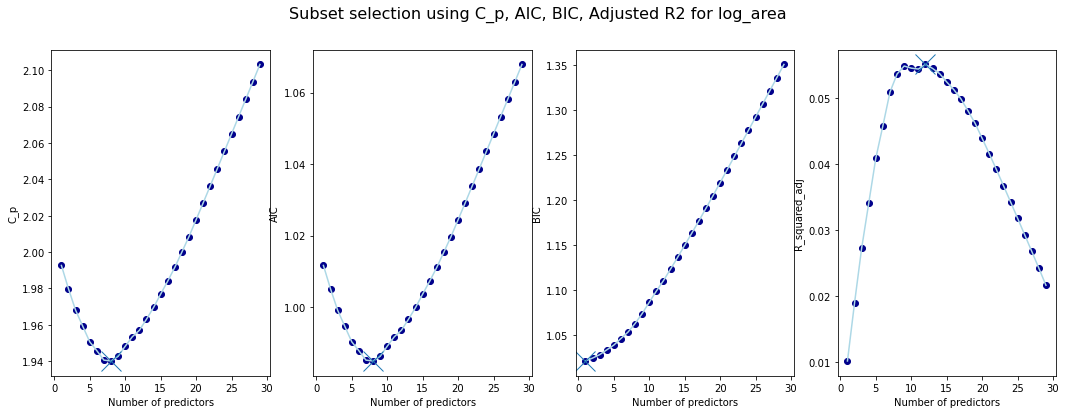

Criteria: C_p Model Predictors: ['month_dec', 'month_sep', 'X', 'month_may', 'day_fri', 'temp', 'month_feb', 'wind']

Criteria: AIC Model Predictors: ['month_dec', 'month_sep', 'X', 'month_may', 'day_fri', 'temp', 'month_feb', 'wind']

Criteria: BIC Model Predictors: ['month_dec']

Criteria: R_squared_adj Model Predictors: ['month_dec', 'month_sep', 'X', 'month_may', 'day_fri', 'temp', 'month_feb', 'wind', 'DMC', 'day_sat', 'day_sun', 'day_tue']

---------------------------------------------------
---------------------------------------------------
---------------------------------------------------


In [22]:
y_fs = ['area', 'log_area']
X_fs = data


# My fs object returns the DataFrame. 
# The object can then be put directly into the plot_feature_selection_criterion() function along with the 
# predictor DataFrame and the y values and the name of the model (optional).


for res in y_fs:
    
    model = res
    fs = feature_selection(X_fs, df[res])
    print(fs.head())
    
    plot_feature_selection_criterion(fs, X_fs, df[res], model, save = True)
    variables = ['C_p', 'AIC','BIC','R_squared_adj']
    
    for v in (variables):
        if v == "R_squared_adj":
            model = fs[fs[v] == fs[v].max()]["features"] 
        else:  
            model = fs[fs[v] == fs[v].min()]["features"] 
        print(f"Criteria: {v} Model Predictors: {list(model)[0]}\n")
    print("---------------------------------------------------")
    print("---------------------------------------------------")
    print("---------------------------------------------------")
    




#### We expected the log of area to perform better so we will only fit linear models to that response

In [23]:
test_data = pd.get_dummies(X_test, columns = ['month', 'day'])
y_test_log = np.log(y_test + 1)


#R^2
model_predictors_r = data[list(fs[fs["R_squared_adj"] == fs["R_squared_adj"].max()]["features"])[0]]

#AIC/C_[]
model_predictors_ac = data[list(fs[fs["AIC"] == fs["AIC"].min()]["features"])[0]]

#BIC
model_predictors_b = data[list(fs[fs["BIC"] == fs["BIC"].min()]["features"])[0]]



mod_pred = [model_predictors_r, model_predictors_ac, model_predictors_b]
count = 0
for m in mod_pred:
    lr_model = linear_model.LinearRegression(fit_intercept = True)
    lr_model.fit(test_data[m.columns], y_test_log)
    RSS = MSE(y_test_log,lr_model.predict(test_data[m.columns])) * len(y_test_log)
    R_squared = lr_model.score(test_data[m.columns],y_test_log)
    
    if count == 0:
        print("Adjusted R^2:")
    elif count == 1:
        print("AIC & C_p")
    else:
        print("BIC")
    
    print(f"RSS: {round(RSS,2)}\nR^2: {round(R_squared,2)}")
    print("------------------------------")
    count += 1

Adjusted R^2:
RSS: 152.81
R^2: 0.15
------------------------------
AIC & C_p
RSS: 159.01
R^2: 0.11
------------------------------
BIC
RSS: 170.32
R^2: 0.05
------------------------------


In [25]:
#Predictors of best linear regression model
print(model_predictors_r.columns)

Index(['month_dec', 'month_sep', 'X', 'month_may', 'day_fri', 'temp',
       'month_feb', 'wind', 'DMC', 'day_sat', 'day_sun', 'day_tue'],
      dtype='object')


### Penalized Models

In [21]:
eda  = pd.concat([X_train, y_train], axis = 1)


746.28

In [19]:
X = pd.get_dummies(eda.drop(columns = "area"), columns = ["month", "day"])
X /= X.std(axis=0)
X.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
140,0.861634,4.122887,16.061271,1.928561,2.734924,1.492519,3.904956,2.433800,0.984888,0.0,...,0.0,0.0,2.121333,0.000000,2.815058,0.0,0.000000,0.000000,0.0,0.0
360,2.584903,4.122887,16.343977,1.859956,3.146059,2.174814,3.280877,2.621016,1.203752,0.0,...,0.0,0.0,2.121333,2.677441,0.000000,0.0,0.000000,0.000000,0.0,0.0
221,1.292451,3.298309,16.485331,2.152670,2.844082,2.963717,3.316538,3.057852,1.969776,0.0,...,0.0,0.0,2.121333,2.677441,0.000000,0.0,0.000000,0.000000,0.0,0.0
469,2.584903,2.473732,16.078940,0.222585,0.101987,2.622570,2.442827,2.059369,5.143304,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,2.604401,0.000000,0.0,0.0
275,1.723269,4.947464,14.948113,0.402482,1.402321,0.426434,0.909373,3.806713,2.681084,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,3.116424,0.0,0.0


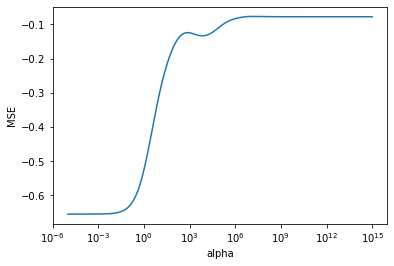

In [53]:
n_alphas = 250
alphas = np.logspace(-5, 15, n_alphas)
results = {}

for a in alphas:
    ridge = linear_model.Ridge(alpha = a)
    mn_score  = np.mean(cross_val_score(ridge, test_data, y_test_log))
    results[a] = mn_score


ridge_MSE_ax = [results[a] for a in alphas]
fig = plt.figure()
plt.plot(alphas, ridge_MSE_ax)
plt.xscale("log")
plt.ylabel("MSE")
plt.xlabel("alpha")
#fig.savefig("Images/ridge_alpha_MSE.png")
plt.show()

In [133]:
pd.concat([forest_cont, forest_dum], axis = 1, join = 'inner')

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,3.025355,4.065370,15.615628,0.409078,0.380140,1.118549,1.412180,3.125485,3.739564,0.000000,...,0,0,0,1,0,0,0,0,0,0
1,3.025355,3.252296,16.412714,0.552724,2.697264,1.469467,3.099907,2.022372,0.502330,0.000000,...,0,1,0,0,0,0,0,0,1,0
2,3.025355,3.252296,16.412714,0.682317,2.769019,1.469467,2.514369,2.022372,0.725587,0.000000,...,0,1,0,0,0,1,0,0,0,0
3,3.457549,4.878444,16.611985,0.519935,0.312417,1.973911,1.429402,5.944549,2.232576,0.675769,...,0,0,0,1,0,0,0,0,0,0
4,3.457549,4.878444,16.177211,0.800981,0.411987,2.105505,1.963275,6.067117,1.004659,0.000000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1.728774,2.439222,14.782312,0.885295,2.683155,0.416714,4.787635,1.961088,1.506989,0.000000,...,0,0,0,0,0,0,1,0,0,0
513,0.864387,3.252296,14.782312,0.885295,2.683155,0.416714,3.771554,4.351165,3.237235,0.000000,...,0,0,0,0,0,0,1,0,0,0
514,3.025355,3.252296,14.782312,0.885295,2.683155,0.416714,3.651002,4.289881,3.739564,0.000000,...,0,0,0,0,0,0,1,0,0,0
515,0.432194,3.252296,17.101106,2.279594,2.477968,2.478354,4.408757,2.573929,2.232576,0.000000,...,0,0,0,0,0,1,0,0,0,0


In [134]:
### Do get_dummies before splitting !!!
forest_md = fire[['month', 'day']]
forest_cont = fire.drop(columns = ['month', 'day', 'area'])
forest_dum = pd.get_dummies(forest_md)

#Scale continuous
forest_cont /= forest_cont.std(axis=0)

X = pd.concat([forest_cont, forest_dum], axis = 1, join = 'inner')
y = np.log(fire['area'] + 1)

X_train, X_test, y_train, y_test = TTS(X, y, test_size = 0.2, random_state = 5)




,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
140,0.864387,4.065370,16.467061,1.975128,2.767407,1.535264,3.771554,2.390077,1.004659,0.0,...,0,0,1,0,1,0,0,0,0,0
360,2.593162,4.065370,16.756910,1.904867,3.183425,2.237099,3.168794,2.573929,1.227917,0.0,...,0,0,1,1,0,0,0,0,0,0
221,1.296581,3.252296,16.901835,2.204649,2.877861,3.048595,3.203237,3.002917,2.009318,0.0,...,0,0,1,1,0,0,0,0,0,0
469,2.593162,2.439222,16.485176,0.227959,0.103198,2.697678,2.359374,2.022372,5.246553,0.0,...,0,0,0,0,0,0,1,0,0,0
275,1.728774,4.878444,15.325779,0.412201,1.418976,0.438647,0.878307,3.738325,2.734905,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,3.457549,4.878444,16.485176,2.021969,2.791997,1.535264,2.256044,3.860893,3.013977,0.0,...,0,0,1,0,0,0,0,0,1,0
73,2.160968,3.252296,16.086633,2.299892,2.477161,1.973911,2.979355,2.635213,2.511648,0.0,...,0,0,0,0,0,0,0,0,1,0
400,3.889743,4.065370,16.901835,0.772876,1.200083,3.070527,4.822078,2.083656,2.511648,0.0,...,0,0,0,0,0,0,0,0,0,1
118,1.296581,3.252296,16.322136,0.619862,0.349100,1.359805,1.825501,1.838520,2.232576,0.0,...,0,0,0,0,1,0,0,0,0,0


In [143]:
np.mean(cross_val_score(DTR, X_train, y_train, cv = 10))

-1.0874474716171587

In [145]:
np.mean(cross_val_score(RandomForestRegressor(), X_train, y_train, cv = 10))

-0.15237510130349632

In [147]:
np.mean(cross_val_score(bag(), X_train, y_train, cv = 10))

-0.2164452329465834

In [148]:
# def train_set_cv(models, X_train, y_train, ):
#     report = {}
#     for m in models:

#         report[m] = np.mean(cross_val_score(model, X_train, y_train, cv=10))
        
#     return report

# # regr = RandomForestRegressor()
# # bagr = bag()
# # DTR = DTR()
# models = [DTR, RandomForestRegressor, bag] 
# train_set_cv(models, X_train, y_train)


In [151]:
bagr = bag()
grid_reg = GridSearchCV(bagr,{
    "base_estimator": [None,KNeighborsRegressor(), SVR(gamma='scale')],
    "max_samples": [0.5, 1.0],
    "max_features": [0.5, 1.0],
    "bootstrap": [True, False],
    "bootstrap_features": [True, False]
})

bagger = grid_reg.fit(X_train, y_train)
export_file = pd.DataFrame(bagger.cv_results_)
export_file.to_excel("Data/Bag_Reg_Grid_better.xlsx")
export_file



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_bootstrap,param_bootstrap_features,param_max_features,param_max_samples,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017157,0.003114,0.002606,7.997309e-04,None,True,True,0.5,0.5,"{'base_estimator': None, 'bootstrap': True, 'b...",-0.126478,-0.195726,-0.188022,-0.208329,-0.205762,-0.184864,0.030080,16
1,0.016155,0.000402,0.001996,2.102414e-06,None,True,True,0.5,1,"{'base_estimator': None, 'bootstrap': True, 'b...",-0.168848,-0.200966,-0.368347,-0.164004,-0.097882,-0.200010,0.090594,19
2,0.015562,0.000486,0.001793,3.994563e-04,None,True,True,1,0.5,"{'base_estimator': None, 'bootstrap': True, 'b...",-0.326445,-0.149673,-0.190480,-0.201324,-0.200956,-0.213776,0.059440,20
3,0.018748,0.000746,0.001996,1.488160e-06,None,True,True,1,1,"{'base_estimator': None, 'bootstrap': True, 'b...",-0.294559,-0.307039,-0.231931,-0.188270,-0.270355,-0.258431,0.043440,32
4,0.013159,0.000968,0.002205,3.938918e-04,None,True,False,0.5,0.5,"{'base_estimator': None, 'bootstrap': True, 'b...",-0.297260,-0.220163,-0.135554,-0.160983,-0.302576,-0.223307,0.068334,22
5,0.015758,0.000399,0.001995,1.907349e-07,None,True,False,0.5,1,"{'base_estimator': None, 'bootstrap': True, 'b...",-0.177650,-0.130374,-0.253932,-0.159676,-0.103884,-0.165103,0.051052,15
6,0.015359,0.000489,0.001995,0.000000e+00,None,True,False,1,0.5,"{'base_estimator': None, 'bootstrap': True, 'b...",-0.278947,-0.471829,-0.143397,-0.171554,-0.386586,-0.290463,0.124927,43
7,0.019747,0.000747,0.001995,2.431402e-07,None,True,False,1,1,"{'base_estimator': None, 'bootstrap': True, 'b...",-0.296997,-0.335660,-0.421867,-0.225970,-0.468598,-0.349818,0.086751,47
8,0.014362,0.000489,0.001995,1.907349e-07,None,False,True,0.5,0.5,"{'base_estimator': None, 'bootstrap': False, '...",-0.109789,-0.240823,-0.246290,-0.138210,-0.240637,-0.195150,0.058820,18
9,0.018152,0.000728,0.001994,2.475809e-05,None,False,True,0.5,1,"{'base_estimator': None, 'bootstrap': False, '...",-0.231208,-0.267176,-0.325310,-0.114214,-0.358575,-0.259296,0.084987,34


In [160]:
bagr = bag()
grid_reg = GridSearchCV(RandomForestRegressor(),{
    #"base_estimator": [None,KNeighborsRegressor(), SVR(gamma='scale')],
    "ccp_alpha": [i for i in np.linspace(0.001, 1, 10)],
    "max_samples": [0.5, 1.0],
    "max_features": [0.5, 1.0],
    "bootstrap": [True, False],
    #"bootstrap_features": [True, False]
})

bagger = grid_reg.fit(X_train, y_train)
export_file = pd.DataFrame(bagger.cv_results_)
export_file.to_excel("Data/RF_Grid.xlsx")
export_file     

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicod\anaconda3\envs\PythonData2\lib\site-packag

FileCreateError: [Errno 13] Permission denied: 'Data/RF_Grid.xlsx'

<div style = "background-color: black; height: 80px;">
    <p>asdf</p>
</div>

In [ ]:
#################################################################

In [34]:
#Deep learning Start

In [35]:
#Scale data
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

---------------------------------------
---------------------------------------

Model: relu 
Layers: 102 
Size: (12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12) 
MSE: 1.7293266836838248
R^2 Score: -0.0
Explained Variace: 0.0
Mean Absolute Error: 1.03


<ipython-input-178-d67f6e06b5bf>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-178-d67f6e06b5bf>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-178-d67f6e06b5bf>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()




---------------------------------------
---------------------------------------

Model: logistic 
Layers: 102 
Size: (12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12) 
MSE: 1.727272799369492
R^2 Score: -0.0
Explained Variace: 0.0
Mean Absolute Error: 1.03


---------------------------------------
---------------------------------------

Model: tanh 
Layers: 102 
Size: (12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,

<ipython-input-178-d67f6e06b5bf>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-178-d67f6e06b5bf>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-178-d67f6e06b5bf>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

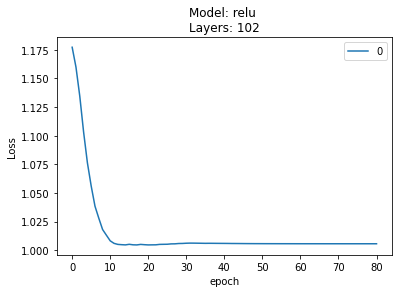

<Figure size 432x288 with 0 Axes>

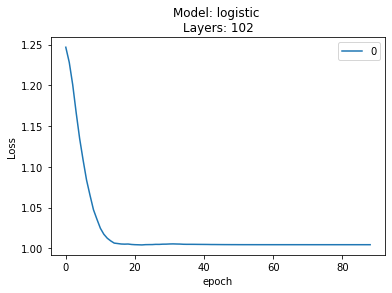

<Figure size 432x288 with 0 Axes>

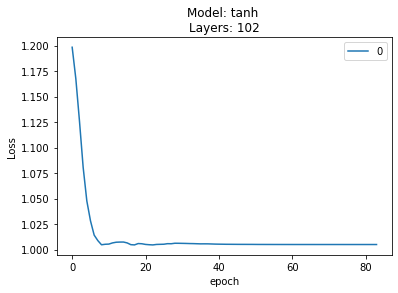

<Figure size 432x288 with 0 Axes>

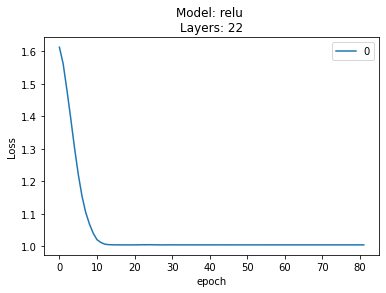

<Figure size 432x288 with 0 Axes>

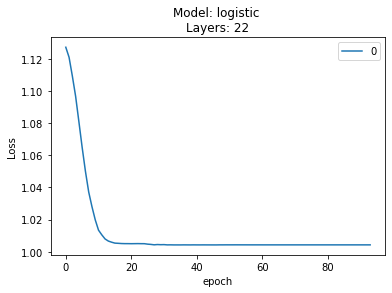

<Figure size 432x288 with 0 Axes>

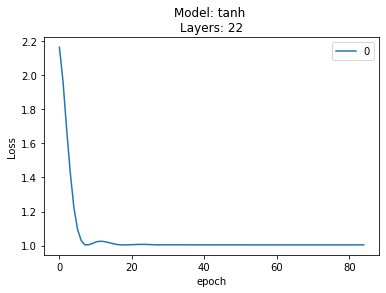

In [179]:
#sizes = [(25,25,25,25,25), (100,100,100), (10,10,10,10,10,10,10,10,10,10)]

sizes = [tuple(12 for i in range(100)), tuple(12 for i in range(20))]
for s in sizes:
    r1 = MLPRegressor(hidden_layer_sizes=s,activation="relu" ,random_state=1, solver = 'sgd', learning_rate = 'adaptive',
                       max_iter=2000)
    reg_r = r1.fit(X_train, y_train)
    
    r2 = MLPRegressor(hidden_layer_sizes=s,activation="logistic" ,random_state=1, solver = 'sgd', learning_rate = 'adaptive',
                       max_iter=2000)
    reg_s = r2.fit(X_train, y_train)
    
    r3 = MLPRegressor(hidden_layer_sizes=s,activation="tanh" ,random_state=1, solver = 'sgd', learning_rate = 'adaptive',
                       max_iter=2000)
    reg_t = r3.fit(X_train, y_train)
    
    
    reg = [reg_r, reg_s, reg_t]
    #print(r1.score)
    for r in reg:
        printReport(r, X_test, y_test, s)



In [9]:
#MARS Models

from pyeart import Earth
model = Earth()
model.fit(X_trainscaled,y_train)
print(model.trace())
print(model.summary())

NameError: name 'Earth' is not defined

In [33]:
len(r.loss_curve_)

len(y_test)

104



---------------------------------------
---------------------------------------
Model: tanh 
Layers: 102 
Size: (100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100)
Mean Response: 1
MSE: 1.73
Relative MSE: 156.89% of mean response.
R^2 Score: -0.0
Explained Variace: -0.0
Mean Absolute Error: 1.01
---------------------------------------
---------------------------------------




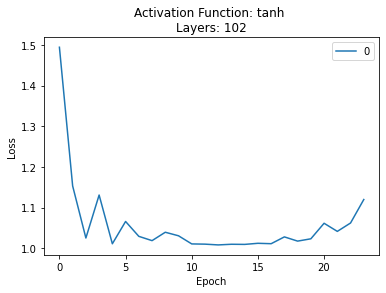

In [73]:
s = tuple(100 for i in range(100))
r2 = MLPRegressor(hidden_layer_sizes = s, activation = "tanh", max_iter=2000).fit(X_trainscaled, y_train)

rep(r2, X_testscaled, y_test, s)

In [179]:
#dir(r2)
#r2.activation

In [72]:
y_pred2=r2.predict(X_testscaled)
np.min(y_pred2)

1.6230199645019563

In [84]:
r2.n_features_in_

12

In [90]:
len(y_test)

104

In [2]:
import pyearth

ModuleNotFoundError: No module named 'pyearth'